<a href="https://colab.research.google.com/github/Talha-coder-01/YoungDevInterns_Machine-Learning_Tasks/blob/main/Hypermaramter_Tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [5]:
# Create a base model
rf = RandomForestClassifier(random_state=42)


In [6]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


In [7]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy', verbose=2)

In [8]:
# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.96


In [9]:
# Get the best model
best_rf = grid_search.best_estimator_

In [10]:
# Make predictions on the test set
y_pred = best_rf.predict(X_test)

In [11]:
# Print the accuracy and classification report
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy on test set: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
# Evaluate the impact of different hyperparameters
results = pd.DataFrame(grid_search.cv_results_)

In [13]:
# Function to plot parameter comparisons
def plot_param_comparison(param_name):
    plt.figure(figsize=(10, 6))
    for value in results[f'param_{param_name}'].unique():
        subset = results[results[f'param_{param_name}'] == value]
        plt.plot(subset['mean_test_score'], label=f'{param_name}={value}')
    plt.xlabel('Index')
    plt.ylabel('Mean test score')
    plt.title(f'Impact of {param_name} on model performance')
    plt.legend()
    plt.show()

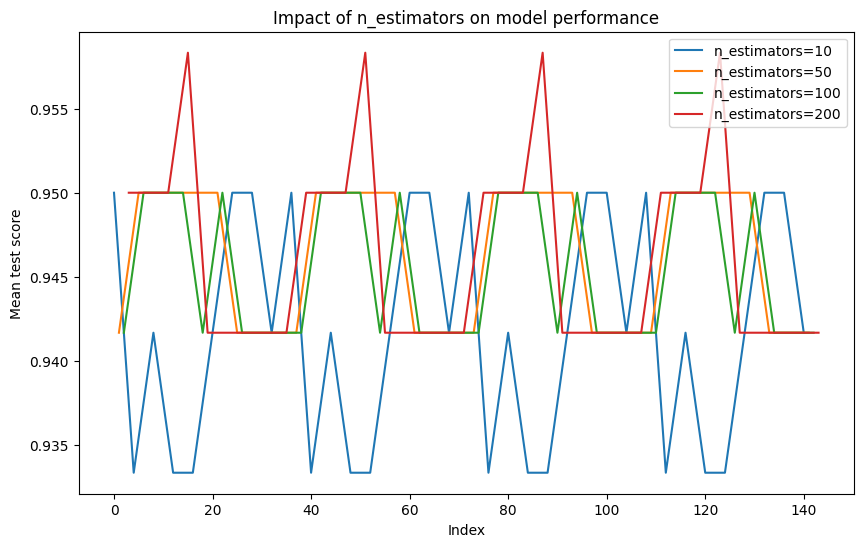

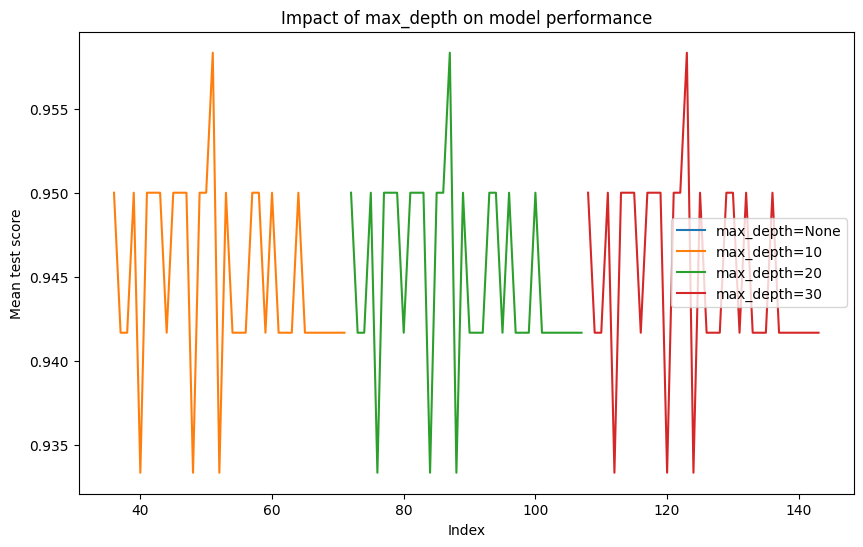

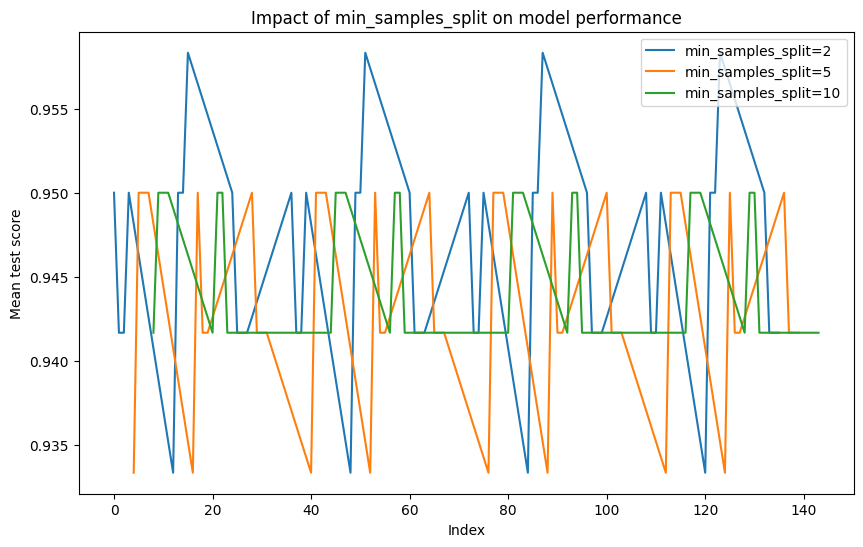

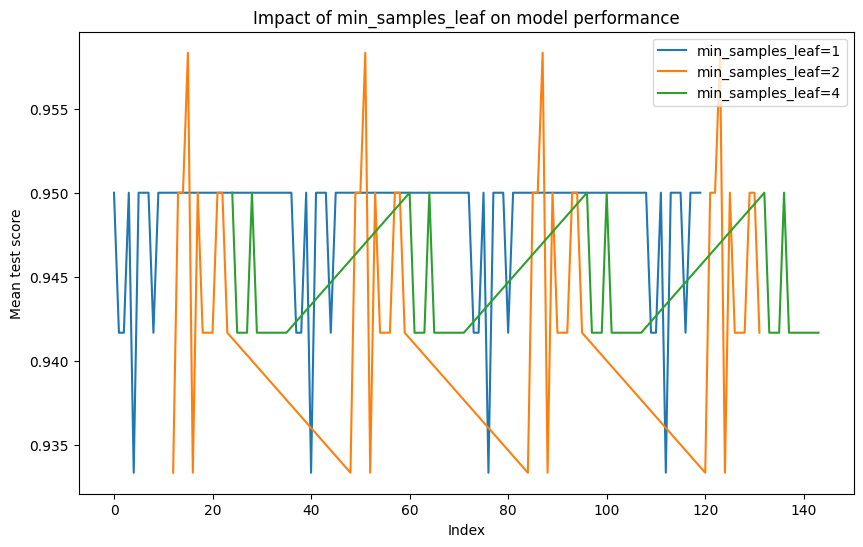

In [14]:
# Plot comparisons for each hyperparameter
for param in param_grid.keys():
    plot_param_comparison(param)


In [15]:
# Print the top 5 models
print("\nTop 5 models:")
top_5_models = results.nlargest(5, 'mean_test_score')
print(top_5_models[['params', 'mean_test_score', 'std_test_score']])


Top 5 models:
                                                params  mean_test_score  \
15   {'max_depth': None, 'min_samples_leaf': 2, 'mi...         0.958333   
51   {'max_depth': 10, 'min_samples_leaf': 2, 'min_...         0.958333   
87   {'max_depth': 20, 'min_samples_leaf': 2, 'min_...         0.958333   
123  {'max_depth': 30, 'min_samples_leaf': 2, 'min_...         0.958333   
0    {'max_depth': None, 'min_samples_leaf': 1, 'mi...         0.950000   

     std_test_score  
15         0.045644  
51         0.045644  
87         0.045644  
123        0.045644  
0          0.061237  
